<a href="https://colab.research.google.com/github/welovecherry/00-AI-Study/blob/main/06_machine_learning/%5BML_Basic%5D_(2_4)_EDA_%E1%84%80%E1%85%B5%E1%84%8E%E1%85%A9_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (실습) EDA 기초 실습

## 실습 개요

1) **실습 목적**

이번 실습에서는 탐색적 데이터분석, EDA(Exploratory Data Analysis; 탐색적 데이터 분석)가 어떤 과정을 통해 이루어지는지 익히기 위해 예제 데이터를
불러와 기초적인 정보를 파악하는것부터 시작하여, 데이터의 특성과 피쳐간의 관계 등 고수준의 정보를
탐색하고 시각화해보는 전체 과정에 이르기까지의 내용을 단계적으로 실습해보는 것을 목적으로 합니다.

2) **수강 목표**

- 주어진 csv파일 데이터셋을 `pandas` 라이브러리를 사용하여 문제없이 파이썬으로 읽어들일 수 있다.
- 데이터의 수량과 각 피쳐의 범위, 타입 등 데이터셋의 기초적인 정보를 빠르게 파악할 수 있다.
- 데이터셋 내 각 피쳐의 분포나 다른 변수와의 관계 등 고수준의 정보들을 어떻게 파악하는지 알고있다.
- 데이터셋에 어떤 전처리가 필요한지 파악하고 그 전처리를 적용할 수 있다.
- `matplotlib`과 `seaborn` 라이브러리를 사용해, 기초적인 시각화를 할 수 있다.


### 실습 목차
* 1. 데이터 불러오기
    * 1-1. 데이터셋 준비 및 불러오기
    * 1-2. 데이터가 잘 불러와졌는지 확인하기
* 2. 데이터 살펴보기
    * 2-1. 데이터 정보 확인
    * 2-2. 데이터 결측치 확인
    * 2-3. 데이터 요약 통계량 확인
* 3. 데이터 분포 살펴보기
    * 3-1. 데이터 이상치 확인
    * 3-2. 변수의 분포 확인 - 히스토그램, 막대그래프
    * 3-3. 변수 간 관계 확인 - 상관행렬그림
* 4. 데이터 전처리
    * 4-1. 결측치 처리
    * 4-2. 데이터 변환



### 환경 설정
패키지 설치 및 임포트

In [4]:
# 패키지 임포트
import numpy as np
import pandas as pd
import sklearn.datasets as D

## 1. 데이터 불러오기


💡 YouTube Statistics 데이터 분석하기


###  데이터 셋 개요 </b>

* 데이터 셋: YouTube Statistics
* 데이터 셋 개요: YouTube Statistics는 YouTube 상위 채널의 통계자료에 대한 데이터셋입니다. 데이터셋은 데이터 분석 및 모델링 대회 플랫폼 Kaggle [링크](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023) 에서 다운받을 수 있으며, 자세한 데이터셋 설명까지 확인할 수 있습니다. 데이터는 직접 다운받거나, kaggle API를 이용할 수 있습니다. 데이터셋은 총 995개의 채널 데이터와 유튜버와 채널 구독자 수, 채널의 모든 동영상의 조회수, 카테고리, 월 수입 등 28개의 변수를 포함합니다. 이 데이터셋은 타겟 변수가 따로 정해져있지 않기 때문에 분석 목표는 임의로 지정하여야 합니다. 인기 YouTube 채널의 성공요인에 대한 분석을 원할 수도 있고, 채널 별 월 수입에 대한 분석을 할 수 있습니다.
* 데이터 셋 저작권: Other (specified in description - [link](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023))
* [Kaggle Dataset page](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023)


### 1-1. 데이터 데이터셋 준비 및 불러오기



In [1]:
!head -3 "Global YouTube Statistics.csv"

rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,T-Series,245000000,2.28E+11,Music,T-Series,20082,India,IN,Music,1,1,1,2258000000,564600,9000000,6800000,108400000,2000000,2006,Mar,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,4055159,7670,7423,12,0,0.05,0.04,0.58,nan,2006,Mar,5,88.2,328239523,14.7,270663028,37.09024,-95.712891



#### 📝 설명: 데이터셋 파일 다운로드 및 준비

데이터셋의 출처인 캐글 홈페이지에 들어가 실습에 활용할 데이터를 다운로드후 Colab에 업로드합니다.
업로드는 왼쪽의 "파일"탭(폴더 모양)에서 수행할 수 있습니다. 업로드가 완료되면 다음의 리눅스 커멘드, `head`를
활용해 파일의 첫 세줄을 프린트해봅니다.



In [ ]:
# 터미널 명령어의 앞에 !를 붙여 셀 내에서 실행해볼 수 있습니다.
!head -3 "Global YouTube Statistics.csv"

rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,T-Series,245000000,2.28E+11,Music,T-Series,20082,India,IN,Music,1,1,1,2258000000,564600,9000000,6800000,108400000,2000000,2006,Mar,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,4055159,7670,7423,12,0,0.05,0.04,0.58,nan,2006,Mar,5,88.2,328239523,14.7,270663028,37.09024,-95.712891


#### 📝 설명: CSV(Comma Separated Values) 파일포멧

실습에 사용할 YouTube Statistics 데이터(`Global YouTube Statistics.csv`)는 csv 파일의 형태로 제공됩니다. csv 파일은 Comma
Separated Values라는 이름처럼 콤마(,)로 나뉘어진 값들을 나열한 파일로, 사용방법이 매우 간단하고
별다른 어려움 없이 직관적으로 해석할 수 있어 테이블 형태의 데이터를 저장하는데에 자주 사용되는 포멧입니다.
csv 포멧은 본질적으로 일반 텍스트(`.txt`) 파일이므로 어떤 방식이든 내용 텍스트를 읽어온 후 적절히
값을 분리하면 테이블 형태의 데이터를 복원할 수 있지만, 여기에서는 `pandas` 패키지를 분석에 사용할
것이므로 `pandas` 패키지에 포함된 `read_csv`함수를 사용해 데이터를 불러옵니다.



#### 📝 설명: ```pandas``` 라이브러리를 이용해 데이터셋의 기본 정보 확인하기


In [5]:
# 데이터 불러오기
data = pd.read_csv('Global YouTube Statistics.csv', encoding='latin1')

파일의 인코딩 형식이 일반적으로 사용되는 `utf-8`이 아니라 `latin-1`이므로
`encoding="latin-1"` 파라미터를 추가로 전달했습니다.
만약 이 파라미터를 설정하지 않는다면 `UnicodeDecodeError`와 같은 에러가 발생해 파일을 읽어오지
못하거나, 파일의 내용 일부가 손상되어 이후 분석을 방해할 수 있습니다.
보통 이러한 추가 정보나 사용상의 주의점들은 데이터셋의 출처에 적혀있는 설명을 잘 읽어보면 알 수 있습니다.

### 1-2. 데이터가 잘 불러와졌는지 확인하기

데이터가 잘 읽어와졌는지 확인해봅니다. `read_csv` 함수를 통해 읽어온 데이터셋은 자동으로 `pandas`의
`DataFrame` 클래스의 오브젝트로 불러와지는데, 이 클래스는 데이터 분석 과정에서 편리한 여러 기능들을
제공합니다. 다음과 같이 단순히 변수명만을 입력후 셀을 실행하면 `DataFrame`의 기능으로 테이블 형태의
데이터를 바로 확인할 수 있습니다.

In [6]:
# 데이터 확인하기
data

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


## 2. 데이터 살펴보기

본격적인 EDA과정을 시작해보도록 하겠습니다.
데이터에 대한 정보를 확인할 때는, 전체 샘플의 수나 변수의 개수와 같이 매우 간단한, 기본적인 정보들을
확인하는것으로 시작하여, 점차 각 변수의 분포, 여러 변수들 상호간의 상관관계같은 고수준의 정보를 확인하는
순서로 진행합니다.

그 과정에서 분석과정에 에러를 일으키거나 방해가 될수 있는 요소들을 확인하고, 모델링을 시작하기 전에
제거하거나 별도 전처리를 통해 변환해주어야하는 부분 등을 확인합니다.


<!--
본격적으로 EDA를 시작하기에 앞서, 이론 강의에서 설명드렸던 EDA 과정은 다음과 같습니다.

1. 목표 명확히 하기: 분석, 모델링 목표
2. 데이터를 전체적으로 살펴보기: 데이터에 이상한 문제가 없는지 확인하기. 변수의 데이터 타입이 잘 정의되어있고 기록되어 있는지.
3. 데이터 분포 및 변수 간 관계 살펴보기: 각 변수의 분포를 확인하여 데이터 범위, 통계량, 이상치 등 확인, 변수 간 관계 살펴보기: 단일 변수만으로 볼 수 없는 것을 변수 간 관계를 확인하며 숨겨진 인사이트 찾기
4. 데이터 전처리: 데이터를 분석 모델이 원하는 형태에 맞게 전처리하기

우리의 목표가 이 데이터를 분석하고, 유튜버에 따른 예상 수익을 분석한다고 가정해봅시다. 이번 파트에서는 데이터의 정보를 확인하고 데이터를 전체적으로 살펴봅시다. -->

먼저 가장 기본적인 정보라고 할 수 있는 샘플 수와 피쳐의 개수, 즉 데이터가 얼마나 많은 수의 샘플들을
포함하는지, 분석에 활용할 수 있는 변수는 몇 개인지 확인해봅니다. 이를 위해서는 ```DataFrame```의 ```.shape``` 속성을 이용합니다.

Note:
- Python에서 많이 사용하는 ```pandas```, ```numpy```, ```PyTorch``` 등의 라이브러리는 데이터(데이터프레임, 어레이, 텐서)의 크기를 ```.shape```를 이용해 확인할 수 있습니다.
- 사실 위 셀에서 했던것처럼 데이터프레임을 테이블형태로 프린트하면 기본적으로 row, column의 개수가
함께 표시되어 일반적으로는 이번처럼 별도 과정을 거쳐 확인할 필요는 없습니다.


In [7]:
# 데이터 크기 확인하기
# print(data.shape)
print(data.shape)

(995, 28)


데이터는 995개의 데이터 포인트(행)과 28개의 변수(열)로 이루어져 있습니다. ```pandas```가 읽어온 각 변수의 이름은 ```.column``` 속성을 이용해 확인할 수 있습니다.

In [8]:
# 데이터의 컬럼 이름 확인하기
# data.columns
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

Note: csv파일 내에 각 column, 변수의 이름이 지정되지 않은 경우 여기에서 컬럼의 이름이
`[0,1,2,...]`로 나타나거나, 첫번째 데이터 샘플이 column의 이름으로 잘못 파싱되는 경우가 생길 수
있습니다. 이런 경우 ```read_csv```함수의 ```header``` 옵션을 수정해 문제를 해결합니다.

### 2-1. 데이터 정보 확인
데이터 샘플 개수, 데이터 변수 개수, 데이터 변수 인덱스와 이름, 데이터 변수 타입 등을 살펴봅니다. 데이터 및 각 변수의 데이터 타입이 원하는대로 잘 정의되었는지 확인합니다. `pandas` 라이브러리의 `info` 메소드를 이용합니다.

예를 들어, 유튜버 순위인 'rank' 변수는 1,2,3,4 등의 int (정수) 타입이어야 하고, 유튜버 이름인
'Youtuber' 변수는 string (문자열) 타입이어야 할것으로 예상할 수 있습니다. 실제로는 `pandas`
`DataFrame`에서는 string과 같이 단순한 숫자 형태가 아닌, 복잡한 데이터는 `object` 타입으로 저장됩니다.


In [ ]:
# 데이터 정보 살펴보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

좀더 자세히 확인해보고 싶은 피쳐가 있다면 다음과 같이 좀더 자세히 살펴볼 수 있습니다.
눈에띄는 피쳐가 없다면 주석처리된 부분의 코드를 활용해 랜덤으로 피쳐 하나를 골라 살펴볼 수도 있습니다.

In [9]:
# 여러번 실행했을 때 같은 결과가 나오도록 랜덤 시드를 고정합니다.
np.random.seed(1234)

In [ ]:
# 살펴볼 피쳐의 인덱스를 랜덤으로 선택합니다.
# feature_index = 6
feature_index = np.random.choice(len(data.columns))
print(f"피쳐 번호: {feature_index}")

# 데이터셋에서 인덱스에 해당하는 피쳐 이름을 가져오고, 이를 이용해 다시 데이터에서 피쳐를 선택
feature_name = data.columns[feature_index]
print(f"피쳐 이름: {feature_name}")
data[feature_name]

피쳐 번호: 15
피쳐 이름: highest_monthly_earnings


0      9000000.00
1            0.05
2      5400000.00
3      7900000.00
4      7300000.00
          ...    
990    2200000.00
991     258900.00
992        268.00
993      15500.00
994      96000.00
Name: highest_monthly_earnings, Length: 995, dtype: float64

In [14]:
np.random.seed(123)
feature_idx = np.random.choice(len(data.columns))
print(f"feature idx: {feature_idx}")
feature_name = data.columns[feature_idx]
data[feature_name]

feature idx: 13


,video_views_for_the_last_30_days
0,2.258000e+09
1,1.200000e+01
2,1.348000e+09
3,1.975000e+09
4,1.824000e+09
...,...
990,5.525130e+08
991,6.473500e+07
992,6.703500e+04
993,3.871000e+06


#### 📝 설명: 범주형(categorical)변수의 탐색

범주형 변수의 경우 다음과 같이 중복값을 제거하는 `unique` 함수를 사용해, 가능한
범주들은 몇개가 있는지, 또 어떤 범주들이 있는지 확인해볼 수 있습니다.


In [ ]:
# 분석할 피쳐의 이름
feature_name = "channel_type"
# 데이터를 가져와 중복값을 제거
unique_values = data[feature_name].unique()
print('범주:', unique_values)
print('범주 수:',len(unique_values))

범주: ['Music' 'Games' 'Entertainment' 'Education' 'People' 'Sports' 'Film'
 'News' nan 'Comedy' 'Howto' 'Nonprofit' 'Autos' 'Tech' 'Animals']
범주 수: 15


In [17]:
feature_name = 'channel_type'
unique_v = data[feature_name].unique()
# unique_v
len(unique_v)


15

각 범주에 속하는 샘플들이 몇개나 존재하는지 확인해보기 위해 `pandas` 라이브러리의 `value_counts` 함수를 이용할 수 있습니다.

In [ ]:
# 각 범주 별로 샘플이 몇 개가 존재하는지 확인
data[feature_name].value_counts()

Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: channel_type, dtype: int64

In [18]:
data[feature_name].value_counts()

,count
channel_type,
Entertainment,304
Music,216
People,101
Games,98
Comedy,51
Education,49
Film,42
Howto,36
News,30


이번에는 임의의 샘플(row)을 골라 똑같이 육안으로 관찰해봅니다.

In [19]:
# 임의의 샘플 선택
sample_index = np.random.choice(len(data))
print(f"샘플 인덱스: {sample_index}")
# 선택된 데이터 보기
data.iloc[sample_index]

샘플 인덱스: 382


In [20]:
sample_idx = np.random.choice(len(data))
print("sample idx: ", sample_idx)
data.iloc[sample_idx]

sample idx:  322


,322
rank,323
Youtuber,Zach Choi ASMR
subscribers,21900000
video views,5918314128.0
category,People & Blogs
Title,Zach Choi ASMR
uploads,946
Country,United States
Abbreviation,US
channel_type,People


이렇게 육안으로 데이터 샘플들을 살펴보는 과정은 단순하고, 지루해보일 수 있는 부분이지만
- 데이터 자체에 대한 __이해도__를 높일 수 있는 가장 쉬운 방법이고,
- 이 단계만으로도 데이터셋의 수많은 __의미있는 특성들을 파악__할 수 있으며,
- 자동화, 정형화된 분석 프로세스로 알 수있는 정보에는 __한계__가 있을수 있으므로

__충분한 시간을 들여__ 데이터를 관찰해보고 익숙해지도록 합니다.
복잡하고 어려운 데이터를 사용하는, 해결할만한 가치가 있는 문제일수록 직접 관찰하지 않고서는 알 수 없는 정보와 패턴을 많이 포함하는 경우가 많으므로, 이 단계의 중요성이 더 커지게 됩니다.

뒤에 진행할 전체적인 탐색과정 중간중간에도, 수시로 위 셀에서처럼 샘플이나 피쳐별로
직접 데이터를 확인해보는 과정을 수행합니다.

### 2-2. 데이터 결측치 확인

데이터에 결측치(NULL, NA, NaN) 값이 있는지 확인합니다. 이러한 값이 존재하면 분석 과정에서 에러를
발생시키거나 결과에 악영향을 끼치지만, 데이터와 피쳐의 종류에 따라 결측치도 다양한 의미를 지닐 수 있어
제거하거나 다른 값으로 채우는 등의 처리를 함부로 수행해서는 안됩니다.

여기에서는 먼저 데이터셋 내의 결측치가 어떤 맥락에서 등장하는지 대략적으로 파악해본 뒤에,
어떤 처리를 적용할지 결정해 보겠습니다.

```pandas``` 라이브러리의 ```.isnull()```와 ```.isna()``` 메소드를 이용하여 데이터 내에 결측치가 존재하는지 확인합니다. ```.isnull()``` 혹은 ```.isna()``` 메소드를 이용하면 데이터 내 모든 값에 대해서 각 값이 결측치인지 여부를 boolean 값으로 나타냅니다.

In [21]:
# 데이터 내 결측치가 있는지 확인하기
data.isnull()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
992,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


각 값이 결측치인지를 한 눈에 보기 위해 각 변수별로 결측치가 몇 개인지 확인합니다. 이는 `.isnull()`의 결과를 열 별로 합하는 `sum` 메소드를 이용합니다.

`sum` 메소드에는 데이터를 어떤 축으로 더할것인지를 지정하는 `axis` 옵션이 있고,
별도로 지정하지 않을 경우 default로 `axis=0`옵션이 사용됩니다.

`axis`를 0으로 지정하면, 주어진 데이터를 column-wise로, 즉 세로로 합치는 것이므로 열, 피쳐별로
합계값을 확인할때 사용합니다. 반대로 `axis=1`을 지정하면 행별, 샘플별로 합계값을 확인할 수 있습니다.

In [22]:
# 데이터 내 NULL 값이 있는지 변수 별로 확인하기
data.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


각 변수, 피쳐별로 얼마나 많은 결측치를 포함하는지 확인해본 결과, 결측치를 가장 많이 포함하는
`subscribers_for_last_30_days` 변수에는 337개의 데이터가 비어있는 것을 확인할 수 있습니다.
또한, `Country`, `Abbreviation`, `Gross tertiary education enrollment (%)` 등
8개의 변수는 똑같이 122~123개 정도의 결측치를 포함한다는 사실도 알아챌 수 있습니다.
이런 경우 변수들이 비어있는 샘플이 완전히 랜덤으로 나타나는게 아니라, 122개 정도의 샘플에서 이 8개
피쳐들이 동시에 비어있는 것이 아닌지 의심해 보는 것이 합리적일 것입니다.


In [23]:
# 결측치를 하나라도 포함하는 행의 인덱스를 확인
sample_indices_with_nan = data.isnull().sum(axis=1) > 0

# 결측치를 하나라도 포함하는 행들을 확인
data[sample_indices_with_nan]

테이블을 살펴보면 결측치를 가진 행들 중 Movies, Music등 실제 유튜버가 아니라 유튜브 내의 영상
카테고리가 샘플에 포함되어있으며, 이런 샘플들에서 Country, Abbreviation등 값이 공통적으로
NaN처리 되어있는다는 사실을 쉽게 알 수 있습니다.

위에서 8개 피쳐가 똑같이 122\~123개의 NaN을 포함하고 있었으므로, "122\~123개의 행에서 이 8개 변수의 값이
공통으로 비어있을것이다."라는 가설을 세우고 다음 코드를 통해 검증해봅니다.

In [26]:
sample_indices_with_nan = data.isnull().sum(axis=1) > 8

data[sample_indices_with_nan]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,2.411823e+10,Film & Animation,goldmines,1,NaN,NaN,Music,...,NaN,2006.0,Aug,15.0,NaN,NaN,NaN,NaN,NaN,NaN
38,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,3.231243e+10,Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,NaN,...,NaN,2016.0,Nov,29.0,NaN,NaN,NaN,NaN,NaN,NaN
48,49,Badabun,46800000,1.939805e+10,Entertainment,badabun,1,NaN,NaN,Music,...,75.0,2007.0,Jul,21.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,959,Troom Troom PT,12500000,4.384178e+09,Howto & Style,Troom Troom PT,2738,NaN,NaN,Howto,...,NaN,2015.0,Apr,19.0,NaN,NaN,NaN,NaN,NaN,NaN
967,968,Troom Troom Indonesia,12500000,5.379684e+09,People & Blogs,TROOM TROOM INDONESIA,8,NaN,NaN,People,...,NaN,2020.0,Jul,29.0,NaN,NaN,NaN,NaN,NaN,NaN
972,973,Hero Movies 2023,12400000,1.689091e+09,People & Blogs,Hero Movies 2023,689,NaN,NaN,People,...,NaN,2017.0,Feb,22.0,NaN,NaN,NaN,NaN,NaN,NaN
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# 결측치를 "8개 이상" 포함하는 행의 인덱스를 확인
sample_indices_with_nan = data.isnull().sum(axis=1) >= 8
# 결측치를 "8개 이상" 포함하는 행들이 어떤것인지 확인해봅니다.
data_with_nans = data[sample_indices_with_nan]
print(len(data_with_nans))
data_with_nans

123


In [33]:
sample_indices_with_nan = data.isnull().sum(axis=1) >= 8
data_with_nans = data[sample_indices_with_nan]
print(len(data_with_nans))
data_with_nans

123


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,2.411823e+10,Film & Animation,goldmines,1,NaN,NaN,Music,...,NaN,2006.0,Aug,15.0,NaN,NaN,NaN,NaN,NaN,NaN
38,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,3.231243e+10,Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,NaN,...,NaN,2016.0,Nov,29.0,NaN,NaN,NaN,NaN,NaN,NaN
48,49,Badabun,46800000,1.939805e+10,Entertainment,badabun,1,NaN,NaN,Music,...,75.0,2007.0,Jul,21.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,959,Troom Troom PT,12500000,4.384178e+09,Howto & Style,Troom Troom PT,2738,NaN,NaN,Howto,...,NaN,2015.0,Apr,19.0,NaN,NaN,NaN,NaN,NaN,NaN
967,968,Troom Troom Indonesia,12500000,5.379684e+09,People & Blogs,TROOM TROOM INDONESIA,8,NaN,NaN,People,...,NaN,2020.0,Jul,29.0,NaN,NaN,NaN,NaN,NaN,NaN
972,973,Hero Movies 2023,12400000,1.689091e+09,People & Blogs,Hero Movies 2023,689,NaN,NaN,People,...,NaN,2017.0,Feb,22.0,NaN,NaN,NaN,NaN,NaN,NaN
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# NA를 가진 feature들을 변수로 정의하여 확인합니다.
columns_with_nan = [
  "Country",
  "Abbreviation",
  "Gross tertiary education enrollment (%)",
  "Population",
  "Unemployment rate",
  "Urban_population",
  "Latitude",
  "Longitude"
]
# 위에서 선택한 8개 feature들이, 가설대로 모두 NaN인지 확인해봅니다.
data_with_nans[columns_with_nan].isnull().all(axis=1).sum()


np.int64(122)

"122~123개의 행에서 이 8개 변수의 값이 공통으로 비어있을것이다."라는 가설이 맞음을 확인하였습니다. 실제 분석에 사용할 데이터였다면 좀더 철저한 분석을 거쳐 결측치가 발생한 원인을 파악해보고 값을 제거할지
판단하겠지만, 여기에서는 위처럼 8개이상의 NaN을 포함하는 샘플들은 분석대상이 아니라고 판단하고,
전처리 단계에서 값을 제거해주도록 하겠습니다.

데이터 자체가 NaN, NA, NULL이 아니더라도, 다른 형태로 결측치가 존재할 수 있는데, 변수의 값이 변수가
정의된 데이터의 타입이나 범위에서 벗어난 값들이 여기에 해당합니다. 예를 들어 자연수로 정의되는
구독자의 수가 음수인 경우 이런 값들에 대해서도 별도 처리가 필요할 것입니다.

In [34]:
# 음이 아닌 값을 가지는 변수 내에 음수값이 있는지 확인합니다. any()를 사용하면 여러 값들에 대해서 하나라도 있는지를 확인합니다.
(data['subscribers'] < 0).any()

np.False_

실제로는 변수마다 일일히 위와 같이 확인하기보다는 pandas의 `describe`메소드를 사용해 요약통계량을
확인하면서, 그중 최댓/최솟값이 데이터의 범위를 벗어나는 경우가 있는지 확인하는 방식을 좀더 자주 사용하게 됩니다.

예를 들어, 위도(latitude)와 경도(longitude)는 각각 -90\~90 범위와 -180\~180범위에 존재해야할 것입니다.

In [ ]:
# 위도와 경도 각 변수의 최솟값과 최댓값 확인
print(data[['Latitude','Longitude']].min())
print(data[['Latitude','Longitude']].max())

Latitude     -38.416097
Longitude   -172.104629
dtype: float64
Latitude      61.924110
Longitude    138.252924
dtype: float64


위도와 경도 변수의 최솟값(min)과 최댓값(max)를 비교해보면 모두 기대되는 범위 내에 값이 존재하는 것을 확인할 수 있습니다.

### 2-3. 데이터 요약 통계량 확인

위의 `describe` 함수는 최댓/최소값 이외에도 샘플 수, 평균, 표준편차, 중위수, 25%, 75% 값, IQR
등 유용한 데이터의 요약 통계량을 제공합니다. 이런 데이터의 요약통계량을 살펴보면 각 변수의 대략적인 분포를 확인할 수 있습니다.

In [35]:
# 데이터 요약통계량 보기
data.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


## 3. 데이터 분포 살펴보기

요약 통계량을 통해 데이터 분포를 대략적으로 파악했다면, 이제 데이터를 다양한 방식으로 시각화해
살펴봄으로써 각 변수의 분포를 좀더 자세히 확인해봅니다.

In [36]:
# 데이터 시각화를 위한 패키지 임포트
import matplotlib.pyplot as plt
import seaborn as sns

### 3-1. 데이터 이상치 확인
데이터에 포함된 이상치를 파악해보기 위해 Box Plot 시각화를 사용합니다.



- **Note**: 데이터 시각화를 위해 ```seaborn``` 라이브러리를 이용합니다. 이 라이브러리는 ```matplotlib``` 라이브러리를 이용해 구현되어 있는데, ```pandas```에서 추가적으로 grouping 등 데이터 전처리 없이도 시각화를 쉽고 예쁘게 할 수 있다는 장점이 있습니다. 또한, 함수가 직관적으로 구성되어 있어 실제로 편리하게 이용할 수 있습니다.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

먼저, `lowest_monthly_earnings` 변수의 분포를 boxplot을 이용해 살펴봅니다.

In [ ]:
# boxplot을 확인할 변수를 선택합니다. 여기에서 다른 피쳐를 지정하면 다른 피쳐에도 boxplot을 그릴 수 있습니다.
target_feature = 'lowest_monthly_earnings'

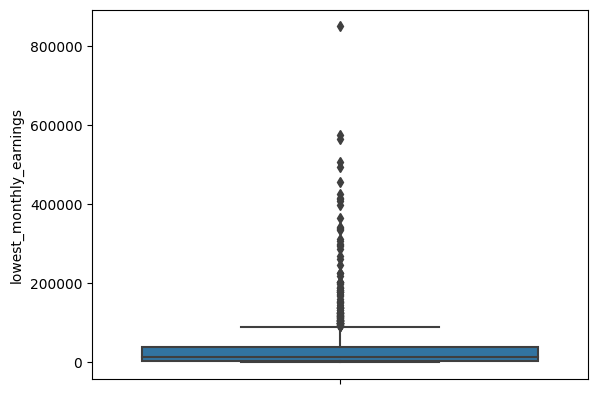

In [ ]:
# boxplot 보기
sns.boxplot(data=data, y=target_feature)  # seaborn(sns) 패키지를 이용해 boxplot 그리기.
plt.show()  # 그림 보여주기

sns.boxplot(data=data, y=)

'lowest_monthly_earnings' 변수의 boxplot을 확인한 결과, 상자는 매우 작고 선 위에 많은 수염 점들이 존재합니다. 즉, 오른쪽으로 긴 long-tail 분포입니다. 이상치는 일반적으로 Q3+IQR 보다 크거나 Q1-1.5*IQR보다 작은 데이터로써 여길 수 있습니다.

In [ ]:
# 이상치 제거를 위한 분위수 확인하기
Q3 = data['lowest_monthly_earnings'].quantile(q=0.75)  # 75% 분위수
Q1 = data['lowest_monthly_earnings'].quantile(q=0.25)  # 25% 분위수
IQR = Q3-Q1
print(Q1, Q3, IQR)

2700.0 37900.0 35200.0


그러나 상위 유튜버에 대한 데이터이므로 소득이 높은 유튜버는 충분히 존재할 수 있습니다. 따라서 이는 이상치로 정의하지 않고 제거하지 않을 수도 있고, 이상치로 정의하고 제거할수도 있습니다. 이런 경우에는
분석의 목표에따라 제거를 할지, 아니면 남겨둘지 결정하면 됩니다. 본 실습에서는 제거하지 않는 방향으로 진행하겠습니다.

### 3-2. 변수의 분포 확인

**히스토그램**

변수의 분포를 확인하기 위해 히스토그램을 볼 수 있습니다. lowest_monthly_earnings 변수를 확인해봅시다.

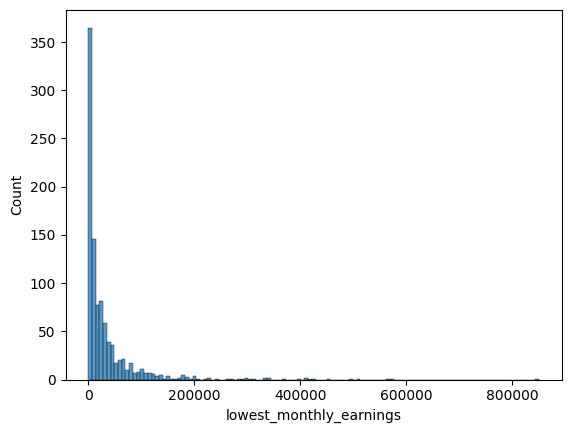

In [ ]:
# 히스토그램 보기
sns.histplot(data=data, x=target_feature)  # 히스토그램 그리기, kde 옵션은 막대 뿐만 아니라 밀도 형태의 선으로도 보여주는 것
plt.show()  # 그림 보여주기

lowest_monthly_earnings 변수는 오른쪽으로 꼬리가 긴 (long-tail, right-skewd) 분포를
가집니다. 이러한 데이터의 경우 y축 변수를 log scale로 변환하여 보면 한개/두개 정도의 매우 작은 수를
가진 데이터들이 확연히 드러나게 되어, 육안으로 확인할 때 훨씬 쉽게 분포를 이해할 수 있습니다.

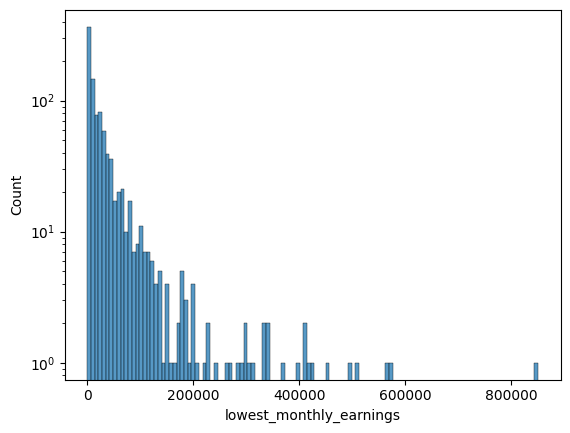

In [ ]:
# 꼬리가 긴 분포를 가진 변수의 히스토그램을 로그스케일로 확인하기.
sns.histplot(data=data, x=target_feature, log_scale=(False, True))
plt.show()  # 그림 보여주기

**막대그래프**

유튜버 채널의 카테고리(주제) 별 월 소득을 확인해보고자 합니다. 카테고리는 범주형 변수이고, 월 소득은 연속형 변수이므로 이를 확인하기 위해 막대그래프(barplot)을 이용합니다.

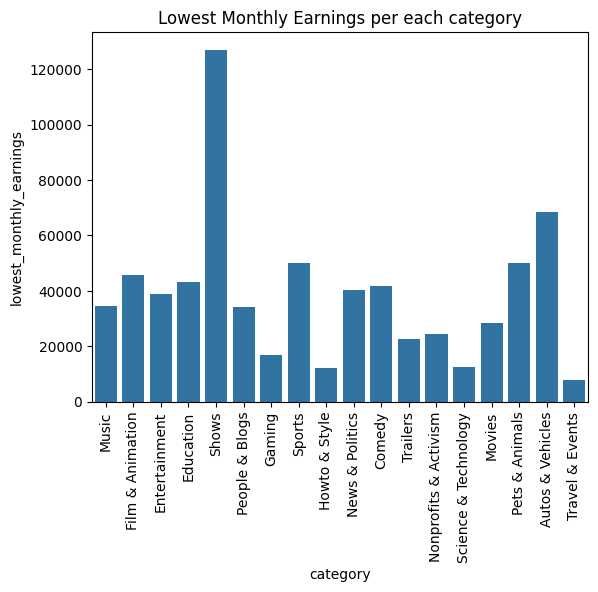

In [ ]:
# 막대그래프의 막대로 범주를 확인할 변수
category_feature = 'category'
# 막대그래프의 높이로 값을 확인할 변수
target_feature = 'lowest_monthly_earnings'

# 막대그래프 생성
barplot = sns.barplot(data=data, x=category_feature, y=target_feature, color='C0', errorbar=None)

# matplotlib에서 x축 레이블의 위치, 방향 설정을 변경합니다.
loc, labels = plt.xticks()
barplot.set_xticklabels(labels, rotation=90)

plt.title('Lowest Monthly Earnings per each category')
plt.show()

막대그래프를 보면 가장 높은 월소득을 보이는 유튜브 카테고리는 'Shows'이고, 가장 적은 월소득을 가지는 카테고리는 'Travel&Events'임을 바로 알 수 있습니다.

### 3-3. 변수 간 관계 확인

#### 📝 설명: 상관계수와 상관행렬

상관계수는 두 변수가 함께 움직이는 경향성, 즉 상관관계의 강도를 -1에서 1사이의 수치로 나타낸
지표입니다. 상관행렬(correlation matrix)은 데이터셋에 포함된 모든 변수들의 쌍에 대해서
상관계수를 측정하고 이를 행렬로 나타낸 것입니다.

상관계수는 두 변수의 순서를 바꾸어도 변하지 않으므로 상관행렬은 대칭행렬로 나타나고, 상관행렬에서
대각원소는 자기 자신과의 상관계수로 무조건 1.0이 되어 의미가 없는 수치입니다. 따라서 상관행렬 및 그의 시각화를 볼 때는 하삼각(lower-triangular)행렬만을 확인합니다.

다음 코드를 통해 지금까지 분석한 유튜브 통계 데이터의 상관행렬을 시각화해봅니다.

- **NOTE**: 원래는 상관분석도 결측치 제거 등의 전처리를 거친 후에 수행해야하지만 여기에서는 실제
분석보다는 내용 설명이 목적이므로 그냥 진행합니다.

In [42]:
# 상관계수 행렬 계산
corr_matrix = data.corr(numeric_only=True).abs()

# 상삼각행렬만 추출
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 공선성 높은 컬럼 찾기 (기준: 0.95 이상)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# 제거
data_reduced = data.drop(columns=to_drop)
print(to_drop)

['highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']


In [38]:
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr(numeric_only=True)

mask mp.triu(np.ones_like())

plt.figure(figsize=(13,10))

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,1.000000,-0.640608,-0.453363,-0.051036,-0.059455,0.016776,-0.029554,-0.186339,-0.248394,-0.248050,...,-0.248392,-0.188571,0.106025,-0.006256,-0.037491,-0.025475,-0.014860,-0.038807,0.000036,0.019003
subscribers,-0.640608,1.000000,0.750958,0.077136,0.057202,0.032683,0.027393,0.278846,0.388941,0.388579,...,0.388935,0.309527,-0.141827,-0.011836,-0.006804,0.082219,-0.008251,0.083521,0.019450,0.022443
video views,-0.453363,0.750958,1.000000,0.165928,-0.061807,-0.068277,-0.050194,0.361856,0.552096,0.551455,...,0.552091,0.187384,-0.127068,-0.038180,-0.015232,0.080214,-0.000729,0.076649,0.037334,0.031268
uploads,-0.051036,0.077136,0.165928,1.000000,-0.108988,-0.078394,-0.098450,0.101521,0.166922,0.167283,...,0.166904,0.008933,-0.154904,0.034900,-0.218396,0.143122,-0.188101,0.072807,-0.067868,0.233169
video_views_rank,-0.059455,0.057202,-0.061807,-0.108988,1.000000,0.877504,0.949936,-0.067193,-0.208863,-0.208935,...,-0.208851,-0.167295,0.006671,0.031231,0.046934,-0.103178,-0.029276,-0.122747,0.015932,-0.016492
country_rank,0.016776,0.032683,-0.068277,-0.078394,0.877504,1.000000,0.898442,-0.098737,-0.148947,-0.148960,...,-0.148946,-0.126175,-0.037807,-0.012699,0.103290,-0.053181,0.066697,-0.024578,0.048323,-0.072476
channel_type_rank,-0.029554,0.027393,-0.050194,-0.098450,0.949936,0.898442,1.000000,-0.129051,-0.187908,-0.187970,...,-0.187896,-0.154021,-0.014002,0.038299,0.062484,-0.116254,0.003697,-0.123852,0.010195,-0.055144
video_views_for_the_last_30_days,-0.186339,0.278846,0.361856,0.101521,-0.067193,-0.098737,-0.129051,1.000000,0.680330,0.680289,...,0.680330,0.451523,0.053123,-0.013670,-0.035610,0.053859,-0.002323,0.051126,-0.026864,0.049033
lowest_monthly_earnings,-0.248394,0.388941,0.552096,0.166922,-0.208863,-0.148947,-0.187908,0.680330,1.000000,0.999955,...,0.999998,0.679360,0.072316,-0.040269,-0.062190,0.104812,-0.042874,0.081206,0.006583,0.100379
highest_monthly_earnings,-0.248050,0.388579,0.551455,0.167283,-0.208935,-0.148960,-0.187970,0.680289,0.999955,1.000000,...,0.999953,0.679699,0.072289,-0.039959,-0.061973,0.104785,-0.042627,0.081226,0.006873,0.100299


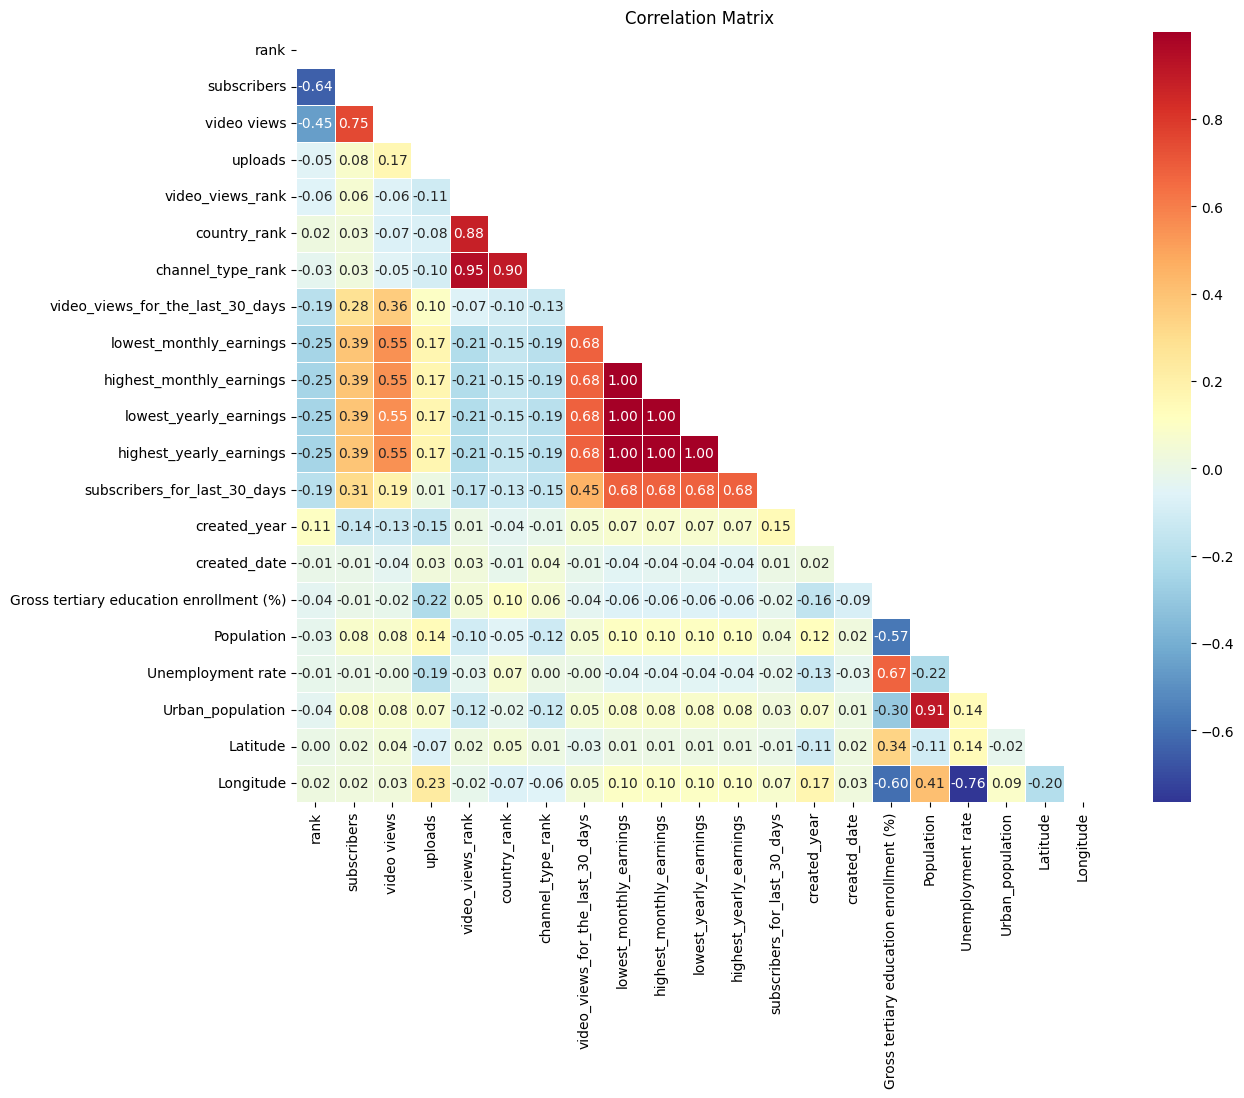

In [39]:
# 데이터의 상관계수 행렬을 생성
corr = data.corr(numeric_only=True)  # 데이터셋으로부터 각 변수별 상관계수를 계산하여 행렬형태로 나타내는 함수. 여기서는 피어슨 상관계수를 이용
# numeric_only는 숫자형 변수만 상관계수를 계산하도록 하는 옵션
# figure에서 생략될 부분을 지정하는 mask 행렬을 생성 - 실제로는 mask 없이 다 생성해도 괜찮습니다.
mask = np.ones_like(corr, dtype=bool)
mask = np.triu(mask)

# 시각화될 그림의 크기를 지정
# 히트맵 형태로 상관행렬 시각화하기
plt.figure(figsize=(13,10))
sns.heatmap(data=corr, annot=True, fmt='.2f', mask=mask, linewidths=.5, cmap='RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

In [43]:
# 상관계수 행렬 계산
corr_matrix = data.corr(numeric_only=True).abs()

# 상삼각행렬만 추출
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 공선성 높은 컬럼 찾기 (기준: 0.95 이상)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# 제거
data_reduced = data.drop(columns=to_drop)
print(to_drop)

['highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']


상관행렬 그림을 보면, 진한 빨간색으로 나타나는 변수 쌍이 존재합니다. 상관계수가 1에 가까운 숫자로 높게 나타날수록 양의 상관관계가 존재함을 의미합니다. 예를 들어, 구독자수(subscribers)와 조회수(video view)는 0.75의 상관계수 값을 가지며, 양의 상관관계가 존재함을 알 수 있습니다. 즉, 구독자수가
많을수록 영상의 조회수가 대체적으로 높다는 정보를 파악할 수 있습니다.

반면에, 진한 파란색으로 나타나는 변수 쌍도 존재합니다. 이 변수들은 상관계수가 -1에 가까운 숫자로 낮게 나타나, 음의 상관관계가 존재함을 의미합니다. 예를 들어, 구독자수(subscribers)와 순위(rank)는 -0.65의 상관계수 값을 가지며, 이는 두 변수 간 음의 상관관계가 존재함을 알 수 있습니다. 즉, 구독자수가 많을수록 대체적으로 순위가 높아 rank 숫자가 낮습니다.

상관계수가 아예 1.0이나 -1.0인 변수들은, 실제로 매우 강한 상관관계를 가지는 의미있는 변수일 가능성이
없지는 않지만, 그보다는 **독립적으로 다룰 수 없는 변수**일 가능성이 훨씬 높습니다.

예를 들어 "수익"이라는 한 변수가 한 column에서는 달러 단위로, 또다른 column에서는 원화 단위로 중복되어 표기되어있다면 두 변수 사이의 상관계수는 1로 나타나겠지만 실제로 한 변수를 통해 다른 하나를 예측하는 등의 분석은 전혀 의미없는 일이 될 것입니다.
이렇게 한 변수가 다른 변수와 사실상 같은 값으로 표현되어버리는 경우 두 변수는 **공선성(Colinearity)**이 있다고 하며, 비슷하게 한 변수가 평균값 등 다른 여러 변수의 조합으로 나타나는 경우는 **다중 공선성(Multicolinearity)**이 있다고 부릅니다.

상관행렬에서 상관계수가 1.0 또는 -1.0으로 나타나는 변수들은 이렇게 공선성이나 다중공선성을 가진 변수일 가능성이 크기 때문에 주의깊게 살펴보아야 합니다.
일반적으로 이렇게 변수들 사이의 공선성이나 다중공선성이 나타나는 경우에는, 관련 변수를 제거하여 모든
변수가 독립적으로 다루어지도록 만드는 방법을 사용합니다.

## 4. 데이터 전처리

위에서 살펴본 데이터들에 대해서 우리가 원하는 분석 모델의 형태에 맞게 데이터를 전처리합니다.

### 4-1. 결측치 처리
위에서 데이터셋 내에 포함된 결측치에 대해서 살펴보았습니다.
8개 이상의 NaN샘플을 가진 데이터 샘플들을 분석대상이 아니라 판단해 제거하도록 결정했듯이, 실제
데이터 분석과정에서는 나머지 모든 NaN값들에 대해서도 의미를 파악해 어떤 처리를 할지 결정하는것이
바람직합니다.

지금은 데이터의 처리에 대한 실습이므로 분석완료된 122개의 데이터샘플은 샘플채로 버리고,
나머지 NaN값들은 적절한 다른 값으로 채워넣도록 합니다.

결측치들은 제거하거나 다른 값으로 대체할때도 역시 `pandas` 라이브러리에서 제공하는 기능을 사용하면 편리합니다.

In [77]:
# 분석을 완료한 데이터 샘플 123개의 인덱스 확인
indices_to_keep = data.isnull().sum(axis=1) < 8

# 샘플을 제거. 비교를 위해 원본 데이터는 별도로 복사해둠.
data_original = data
data = data[indices_to_keep].copy()
# print(f"데이터 샘플 수 변화: {len(data_original)} -> {len(data)}")

print(data_original['subscribers_for_last_30_days'].isnull())
# 나머지 결측치중 가장 많은 비중을 차지하는 subscribers_for_last_30_days에서 NaN을 0으로 대체
print("original: ")
data_original['subscribers_for_last_30_days']
print("after: ")
data["subscribers_for_last_30_days"].fillna(0, inplace=True)
# print(data.columns)
# # 나머지 결측치를 포함하는 모든 행들은 버림(drop). axis=0일 경우 결측치가 있는 행을, axis=1이면 열을 전부 제거한다.
data.dropna(axis=0, inplace=True)
# print(f"처리 완료 후 데이터 샘플 수: {len(data)}")

# # 결측치가 잘 제거되었는지 확인
data.isnull().sum()

0      False
1      False
2      False
3      False
4      False
       ...  
989    False
990    False
991    False
993    False
994    False
Name: subscribers_for_last_30_days, Length: 808, dtype: bool
original: 
after: 


<ipython-input-77-09c38d47ee2a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["subscribers_for_last_30_days"].fillna(0, inplace=True)


,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,0
Title,0
uploads,0
Country,0
Abbreviation,0
channel_type,0


결측치의 제거가 완료되어 808개의 샘플에 대한 데이터만 남았습니다.



### 4-2. 데이터 분포 변환

#### 📝 설명: 로그 변환

앞에서 변수 'lowest_monthly_earnings' 의 분포가 오른쪽으로 너무 꼬리가 길어 왼쪽으로 치우쳐진 것을 확인했습니다. 이를 보정하여 분포를 보기 위해 log scale로 변환을 했는데, 이후 변수의 치우침이 덜해졌습니다.

이처럼 우리가 원하는 분포의 형태로 관측된 데이터의 __분포를 변환__할 수 있습니다. 이러한 종류의 처리는
데이터 분석 과정에 도움이 될수 있지만, 그렇지 않고 악영향을 끼치는 경우도 생길 수 있어, 변수를 해석할
때는 변환을 적용했다는 사실을 충분히 고려하여야하며, 필요한 경우 변환 이전의 데이터로 되돌려 사용합니다.


In [76]:
# 데이터 분포 변환을 위한 scikit-learn 패키지 내 함수 불러오기
from sklearn.preprocessing import scale

다음과 같이 꼬리가 길어 치우친 분포(long-tail, skewd)를 정규분포에 가깝게 하기 위해 log scale로 변환합니다.

In [78]:
# 로그변환을 진행할 변수를 선택합니다. 여기에서 다른 피쳐를 지정하면 다른 피쳐에도 로그변환을 진행해볼 수 있습니다.
target_feature = 'lowest_monthly_earnings'
# 데이터 로그 변환
# 로그 스케일로 변환한 값으로 새 변수를 만듭니다.
#새 변수명은 기존 변수명에 prefix를 붙입니다.
data[f'log_{target_feature}'] = scale(np.log(data[target_feature]+1))  # log에 0값이 들어가는 것을 피하기 위해 1을 더해줍니다.
# 로그변환한 변수의 요약통계량 보기
data[f'log_{target_feature}'].describe()


,log_lowest_monthly_earnings
count,8.080000e+02
mean,2.638154e-16
std,1.000619e+00
min,-3.244308e+00
25%,-1.408595e-01
50%,2.255075e-01
75%,5.563207e-01
max,1.491941e+00


<Axes: xlabel='log_lowest_monthly_earnings', ylabel='Count'>

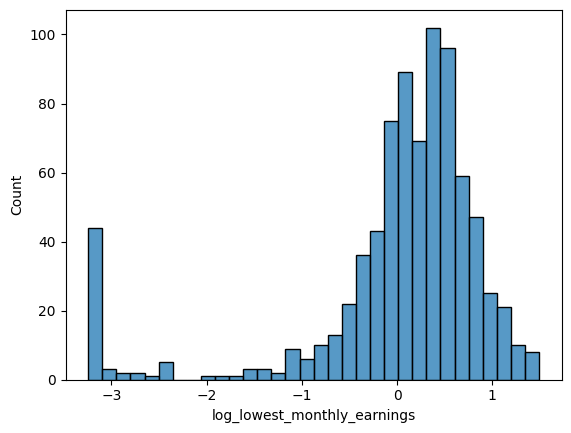

In [81]:
# sns.histplot(data=data, x=target_feature)  # 히스토그램 그리기, kde 옵션은 막대 뿐만 아니라 밀도 형태의 선으로도 보여주는 것

sns.histplot(data=data, x=f'log_{target_feature}')

<Axes: xlabel='log_lowest_monthly_earnings', ylabel='Count'>

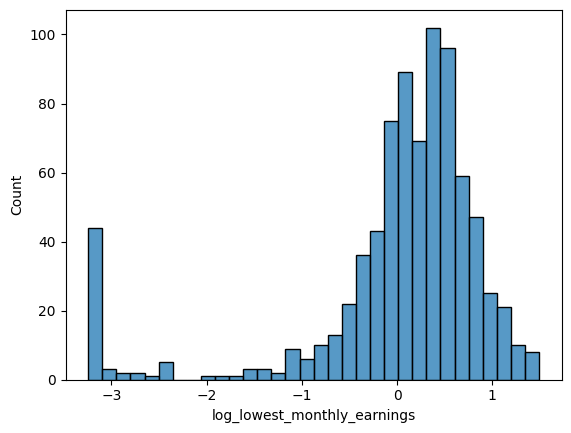

In [80]:
# sns.histplot(data=data, x=target_feature)  # 히스토그램 그리기, kde 옵션은 막대 뿐만 아니라 밀도 형태의 선으로도 보여주는 것

sns.histplot(data=data, x=f'log_{target_feature}') # Use the correct column name created in the previous cell
# target_feature

In [ ]:
# 변환 전후 데이터 요약 통계량 비교하기
data[[target_feature, f'log_{target_feature}']].describe()

,lowest_monthly_earnings,log_lowest_monthly_earnings
count,808.000000,8.080000e+02
mean,38847.407178,2.638154e-16
std,66701.907137,1.000619e+00
min,0.000000,-3.244308e+00
25%,5950.000000,-1.408595e-01
50%,16600.000000,2.255075e-01
75%,41925.000000,5.563207e-01
max,576000.000000,1.491941e+00


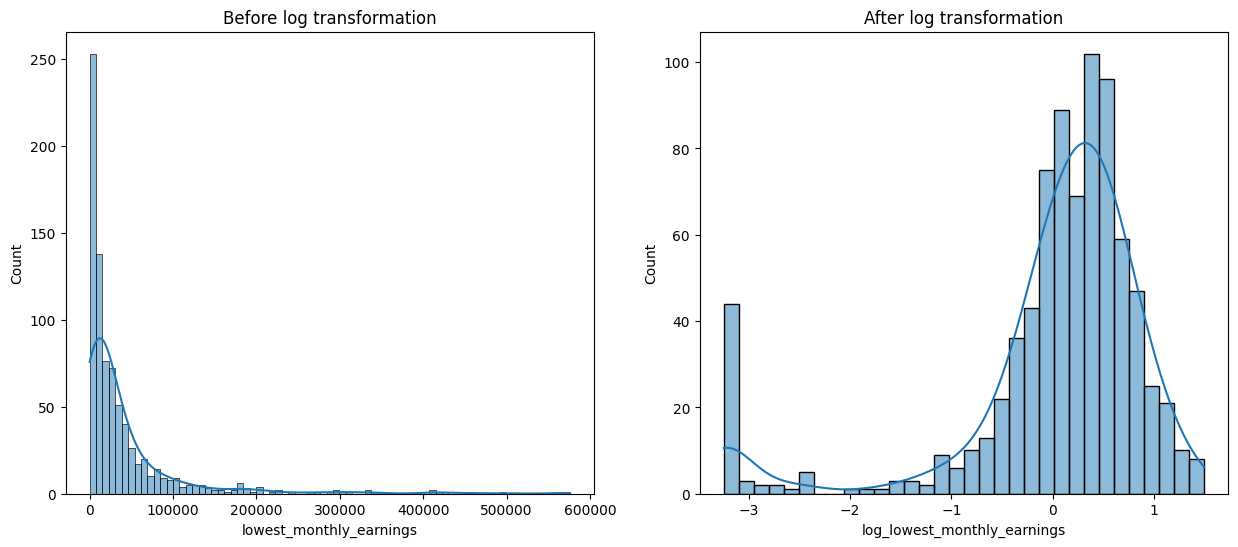

In [ ]:
# 데이터 분포 변환 전후를 비교하기 위해 2개의 plot 지정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# 히스토그램으로 변환 전 데이터의 분포 보기
sns.histplot(data=data, x=target_feature, kde=True, ax=ax[0])
ax[0].set_title('Before log transformation')
# 히스토그램으로 변환 후 데이터의 분포 보기
sns.histplot(data=data, x=f'log_{target_feature}', kde=True, ax=ax[1])
ax[1].set_title('After log transformation')
plt.show()

### 4-3. 데이터 단위 변환

#### 📝 설명: 정규화와 표준화
변수 `lowest_monthly_earnings`는 0에서 850,900까지의 수치를 가지고 있지만 변수 `rank`는 1에서 995까지의 수치를 가집니다. 변수 `lowest_monthly_earnings`에게 100 정도의 수치 차이는
적을 수 있지만, 변수 `rank`에서 100 정도는 매우 다른 수치입니다. 데이터의 분석과정에서 이런 스케일의
차이는 모델의 학습이 느리게 만들거나, 예상치못한 에러를 일으키는 등의 부정적인 영향을 끼칠 수 있으므로
분석 전에 각 변수를 비슷한 스케일로 변환해주는 것이 좋습니다.
다만, 위의 로그변환 예시와 달리 분포의 모양을 변환시키지는 않습니다.

여기에서는 데이터 내 각 변수의 스케일을 균등하게 만들기 위해, 표준화(Standardization)와 정규화(Normalization)를 통한 데이터 단위 변환을 사용해보겠습니다.

- **NOTE**: Normalization, Standardization은 모두 한국어로 "정규화"라고 번역될 수 있고,
맥락에 따라 여기에서 정의된것과 다르게 사용되는 등 용어의 혼동이 있는 용어입니다.

**표준화(Standardization)**는 데이터의 분포를 평균이 0이고 분산이 1이 되도록 변환하는 것으로, 다음 수식으로 표현할 수 있습니다.

$x_\textrm{scaled}=\frac{x-\textrm{Mean}(\mathbf{x})}{\textrm{Stdv}(\mathbf{x})}$.

여기서 $x$는 변환하고자 하는 원래 데이터 포인트 값, $\mathbf{x}$는 한 변수의 데이터 값들 (벡터), 그리고 $\textrm{Mean}(\mathbf{x})과 \textrm{Stdv}(\mathbf{x})$는 벡터 $\mathbf{x}$의 평균과 표준편차를 의미합니다.

**정규화(Normalization 혹은 minmax scaling)**는 데이터를 최솟값이 0이고 최댓값이 1로, 0에서
1사이의 값을 가지도록 변환하는 방법이며 다음 식으로 표현됩니다.

$x_\textrm{scaled}=\frac{x-\textrm{Min}(\mathbf{x})}{\textrm{Max}(\mathbf{x})-\textrm{Min}(\mathbf{x})}$.

여기서 $\textrm{Min}(\mathbf{x})$과 $\textrm{Max}(\mathbf{x})$는 벡터 $\mathbf{x}$의 최솟값과 최댓값을 의미합니다.

In [ ]:
# 데이터 분포 변환을 위한 scikit-learn 패키지 내 함수 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler

먼저, 표준화(Standardization)을 이용하여 데이터의 단위를 변환해보겠습니다.

In [ ]:
# 스케일링을 진행할 변수를 선택합니다. 여기에서 다른 피쳐를 지정하면 다른 피쳐에도 표준화를 진행해볼 수 있습니다.
target_feature = 'lowest_monthly_earnings'
# scikit-learn패키지를 활용한 standardization
standard_scaler = StandardScaler()
data[f'standardized_{target_feature}'] = standard_scaler.fit_transform(data[[target_feature]])
# 표준화한 데이터를 새로운 변수에 저장하기

In [ ]:
# 비교를 위해 변환 전후의 피쳐를 선택
feature_original = data[target_feature]
feature_standardized = data[f'standardized_{target_feature}']

# 변환 전후의 평균, 표준편차 비교
print(f"평균(mean)비교: {feature_original.mean():.7} -> {feature_standardized.mean():.7}")
print(f"표준편차(standard deviation)비교: {feature_original.std():.7} -> {feature_standardized.std():.7}")

평균(mean)비교: 38847.41 -> -1.758769e-17
표준편차(standard deviation)비교: 66701.91 -> 1.000619


변환 후 데이터 요약 통계량을 확인해보면, 평균(mean)과 표준편차(std)가 각각 0, 1의 값으로 변환된 것을 확인할 수 있습니다.
하지만 표준화와 정규화는 분포의 모양 자체를 변화시키는것은 아니므로 그래프의 모양은 완전히 동일하게 나타납니다.

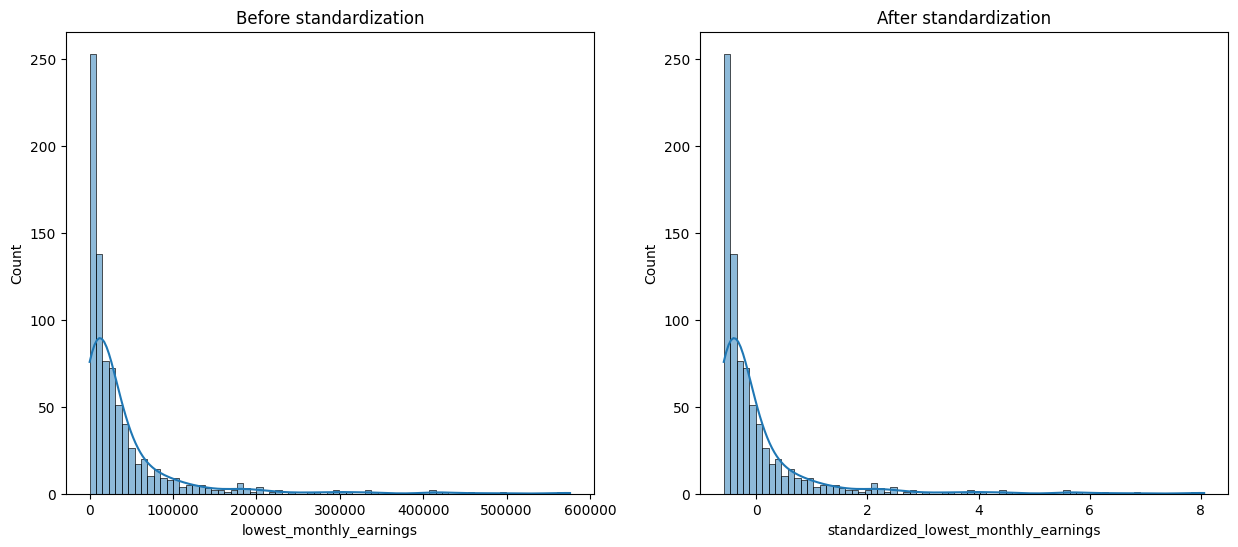

In [ ]:
# 데이터 단위 변환 전후 비교
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))  # 데이터 단위 변환 전후를 비교하기 위해 2개의 plot 지정
# 히스토그램으로 변환 전 데이터의 분포 보기
sns.histplot(data=data, x=target_feature, kde=True, ax=ax[0])
ax[0].set_title('Before standardization')
# 히스토그램으로 변환 후 데이터의 분포 보기
sns.histplot(data=data, x=f'standardized_{target_feature}', kde=True, ax=ax[1])
ax[1].set_title('After standardization')
plt.show()

다음으로, 정규화(Normalization)는 다음과 같이 수행할 수 있습니다.

In [ ]:
# 스케일링을 진행할 변수를 선택합니다. 여기에서 다른 피쳐를 지정하면 다른 피쳐에도 표준화를 진행해볼 수 있습니다.
target_feature = 'lowest_monthly_earnings'
# scikit-learn패키지를 활용한 normalization
normalized_scaler = MinMaxScaler()
data[f'normalized_{target_feature}'] = normalized_scaler.fit_transform(data[[target_feature]])  # 표준화한 데이터를 새로운 변수에 저장하기

In [ ]:
# 비교를 위해 변환 전후의 피쳐를 선택
feature_original = data[target_feature]
feature_normalized = data[f'normalized_{target_feature}']

# 변환 전후의 최대, 최소값 비교
print(f"최소값(min) 비교: {feature_original.min():.7} -> {feature_normalized.min():.7}")
print(f"최대값(max) 비교: {feature_original.max():.7} -> {feature_normalized.max():.7}")

최소값(min) 비교: 0.0 -> 0.0
최대값(max) 비교: 576000.0 -> 1.0


변환 후 데이터 요약 통계량을 보니, 최솟값이 0이고 최댓값이 1인 분포로 변환된 것을 확인할 수 있습니다.
하지만 표준화와 마찬가지로 그래프의 모양 자체는 변화하지 않습니다.

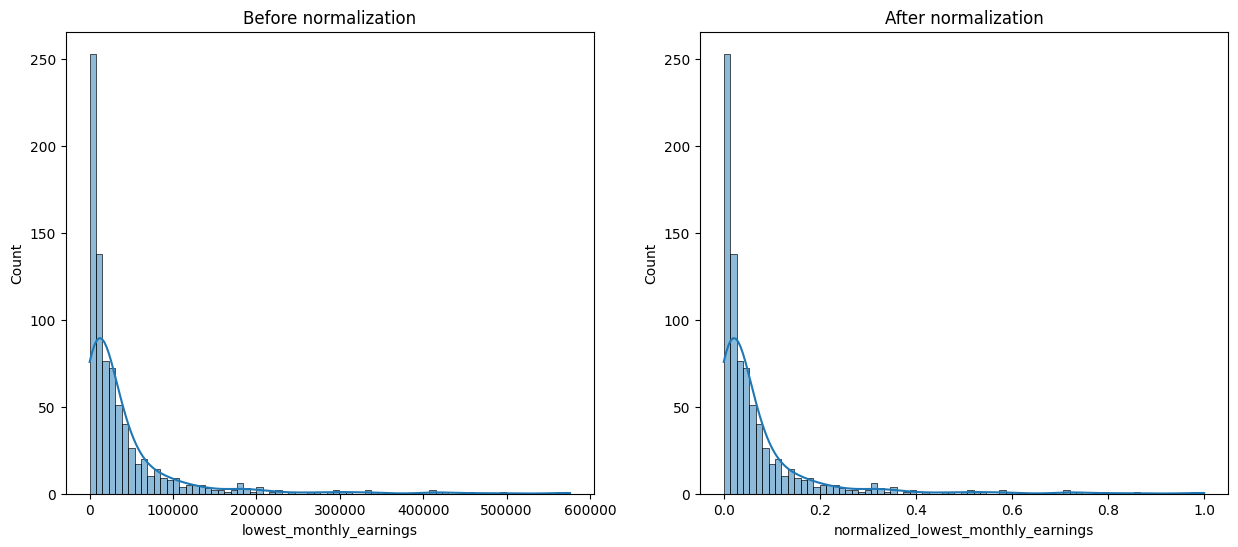

In [ ]:
# 데이터 단위 변환 전후 비교
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))   # 데이터 단위 변환 전후를 비교하기 위해 2개의 plot 지정
# 히스토그램으로 변환 전 데이터의 분포 보기
sns.histplot(data=data, x=target_feature, kde=True, ax=ax[0])
ax[0].set_title('Before normalization')
# 히스토그램으로 변환 후 데이터의 분포 보기
sns.histplot(data=data, x=f'normalized_{target_feature}', kde=True, ax=ax[1])
ax[1].set_title('After normalization')
plt.show()

이렇게 EDA와 데이터 전처리에 대한 실습의 전 과정을 한번씩 살펴보았습니다.
연습이 아닌 실무에서 EDA는 일회적인 작업이 아니라 프로젝트 진행 과정에서 지속적으로 수행되어야 합니다.
이를 통해 데이터에 대한 이해도를 높이며 보다 정확한 분석 결과를 도출할 수 있고, 잘못된 문제설정으로
인해 시간과 노력이 낭비되는 것을 방지할 수 있습니다.

이번 실습에서 익힌 여러 개념과 방법론들을 통해, 훨씬 복잡하고 어려운 데이터가 주어졌을 때에도 길을 잃지
않고 한스텝 한스텝 정확한 분석을 통해, 원하는 결과를 도출할 수 있는 역량을 갖추셨기를 바랍니다.

감사합니다.

## Required Package

sklearn == 1.2.2 <br>
pandas == 1.5.3 <br>
numpy == 1.23.5 <br>
matplotlib == 3.7.1 <br>
seaborn == 0.12.2



## 콘텐츠 라이선스

저작권 : <font color='blue'> <b> ©2023 by Upstage X fastcampus Co., Ltd. All rights reserved.</font></b>

<font color='red'><b>WARNING</font> : 본 교육 콘텐츠의 지식재산권은 업스테이지 및 패스트캠퍼스에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다. </b>